1 - What profiles ( age / job / marital status / etc.) are the most likely to respond positively ?

2 - Does the financial situation of people have an impact on how they answer ?

3 - Do the timing (date / duration) and type of contact matter significantly ?
How ? Is it the same for all groups of people ?

4 - What is the best number of contacts to reach agreement ? What is the best delay ? Are people more likely to agree to the campaign if they have already agreed in the past ?

5 - Does the economy (Employment variation rate / Consumer Price Index  / Consumer Confidence Index / Euribor / etc.) have an impact ? How ? Is it the same for everybody ?

6 - Any interesting insights to add ?

In [ ]:
#https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

# 1 - What profiles ( age / job / marital status / etc.) are the most likely to respond positively ?
# 2 - Does the financial situation of people have an impact on how they answer ?
# 3 - Do the timing (date / duration) and type of contact matter significantly ?
#    How ? Is it the same for all groups of people ?
# 4 - What is the best number of contacts to reach agreement ? What is the best delay ? Are people more likely to agree to the campaign if they have already agreed in the past ?
# 5 - Does the economy (Employment variation rate / Consumer Price Index  / Consumer Confidence Index / Euribor / etc.) have an impact ? How ? Is it the same for everybody ?
# 6 - Any interesting insights to add ?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from google.colab import drive #mounting drive
drive.mount('/content/drive')

df=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", na_values=["unknown\"\""])
df.sample(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,"index,""age","job""""","marital""""","education""""","default""""","housing""""","loan""""","contact""""","month""""","day_of_week""""",...,"campaign""""","pdays""""","previous""""","poutcome""""","emp.var.rate""""","cons.price.idx""""","cons.conf.idx""""","euribor3m""""","nr.employed""""","y"""""""
36014,"36014,""36","admin.""""","single""""","university.degree""""","no""""","yes""""","no""""","cellular""""","may""""","tue""""",...,2,999,0,"nonexistent""""",-1.8,92.893,-46.2,1.266,5099.1,"no""""\r"""
31489,"31489,""32","services""""","married""""","high.school""""","no""""","yes""""","no""""","telephone""""","may""""","wed""""",...,3,999,1,"failure""""",-1.8,92.893,-46.2,1.334,5099.1,"no""""\r"""
21800,"21800,""58","services""""","married""""","high.school""""",NaN,"no""""","no""""","cellular""""","aug""""","wed""""",...,1,999,0,"nonexistent""""",1.4,93.444,-36.1,4.964,5228.1,"no""""\r"""
24310,"24310,""31","services""""","divorced""""","high.school""""","no""""","yes""""","no""""","cellular""""","nov""""","mon""""",...,2,999,0,"nonexistent""""",-0.1,93.200,-42.0,4.191,5195.8,"no""""\r"""
24736,"24736,""36","admin.""""","single""""","university.degree""""","no""""","yes""""","no""""","cellular""""","nov""""","tue""""",...,1,999,1,"failure""""",-0.1,93.200,-42.0,4.153,5195.8,"no""""\r"""
32795,"32795,""35","technician""""","married""""","university.degree""""","no""""","yes""""","no""""","cellular""""","may""""","mon""""",...,3,999,0,"nonexistent""""",-1.8,92.893,-46.2,1.299,5099.1,"no""""\r"""
39035,"39035,""54","technician""""","divorced""""","professional.course""""","no""""","yes""""","no""""","cellular""""","dec""""","mon""""",...,1,6,1,"success""""",-3.0,92.713,-33.0,0.715,5023.5,"no""""\r"""
20900,"20900,""49","blue-collar""""","married""""","basic.4y""""",NaN,"yes""""","no""""","cellular""""","aug""""","thu""""",...,1,999,0,"nonexistent""""",1.4,93.444,-36.1,4.964,5228.1,"no""""\r"""
17481,"17481,""40","blue-collar""""","married""""","basic.4y""""","no""""","yes""""","yes""""","telephone""""","jul""""","mon""""",...,5,999,0,"nonexistent""""",1.4,93.918,-42.7,4.962,5228.1,"no""""\r"""
10851,"10851,""54","housemaid""""","married""""","basic.4y""""",NaN,"no""""","no""""","telephone""""","jun""""","wed""""",...,5,999,0,"nonexistent""""",1.4,94.465,-41.8,4.962,5228.1,"no""""\r"""


In [ ]:
df1 = df.replace('"','',regex=True)
df1.rename(columns = lambda x: x[0:-2], inplace = True)
df1 = df1.rename(columns={"index,\"a":"age","y\"":"accepted"})
df1["age"] = pd.to_numeric(df1["age"].str.split(",").str[1],errors="coerce")
df1["accepted"] = df1["accepted"] == "yes\r"
df1["month"] = df1["month"].astype("category").cat.set_categories(['jan', 'fev', 'mar', 'apr', 'may', 'jun',
                          'jul', 'aug', 'sep','oct', 'nov', 'dec'], ordered= True)

df1.describe(include='all')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
df1.dtypes 

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month             category
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
accepted              bool
dtype: object

In [ ]:
pd.isnull(df1).sum() #checking for null values

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
accepted             0
dtype: int64

In [ ]:
train= df1  #creating Train dataframe where all the rows with null values are removed
train=train.dropna()

In [ ]:
pd.isnull(train).sum() #re-checking for null values in train df

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
accepted          0
dtype: int64

In [ ]:
train.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted
37025,26,unemployed,single,high.school,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2,False
38873,42,management,married,university.degree,no,yes,no,cellular,nov,mon,...,3,999,1,failure,-3.4,92.649,-30.1,0.714,5017.5,False
4816,37,blue-collar,married,basic.4y,no,no,no,telephone,may,wed,...,13,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,False
37195,74,retired,married,high.school,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,False
10066,45,self-employed,married,professional.course,no,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,False
17318,49,technician,married,professional.course,no,yes,no,cellular,jul,fri,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,False
29172,32,blue-collar,single,high.school,no,yes,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,True
31102,41,entrepreneur,married,basic.4y,no,no,yes,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,True
5651,35,student,single,high.school,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3537,39,technician,married,professional.course,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,False


In [ ]:
train.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted
count,30488.000000,30488,30488,30488,30488,30488,30488,30488,30488,30488,...,30488.000000,30488.000000,30488.000000,30488,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,8737,17492,10412,30485,16521,25720,20443,9733,6395,...,NaN,NaN,NaN,25836,NaN,NaN,NaN,NaN,NaN,26629
mean,39.030012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.521451,956.332295,0.194273,NaN,-0.071510,93.523311,-40.602263,3.459938,5160.813409,NaN
std,10.333529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.720150,201.373292,0.522788,NaN,1.610399,0.585374,4.789249,1.777231,75.158065,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.313000,5099.100000,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.444000,-41.800000,4.856000,5191.000000,NaN
75%,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


# Question 1  - What profiles ( age / job / marital status / etc.) are the most likely to respond positively ?

## Exploring Acceptance with one profile parameter at a time


## Age vs Acceptance

In [ ]:
#Dividing the age column into categories

#Income Grouping
conditions_age = [
    (train['age'] <= 18),
    (train['age'] > 18) & (train['age'] <= 28),
    (train['age'] > 28) & (train['age'] <= 38),
    (train['age'] > 38) & (train['age'] <= 48),
    (train['age'] > 48) & (train['age'] <= 60),
    (train['age'] > 60)
    ]

# create a list of the values we want to assign for each condition
values_age = ['< 18 yr', '18-28 yr', '28-38 yr', '38-48 yr', '48-60 yr','> 60 yr']

# create a new column and use np.select to assign values to it using our lists as arguments
train['AgeCateg'] = np.select(conditions_age, values_age)

train["AgeCateg"] = train["AgeCateg"].astype("category").cat.set_categories(['< 18 yr', '18-28 yr',
                                                                             '28-38 yr', '38-48 yr', '48-60 yr','> 60 yr'], ordered= True)


#train[train['AgeCateg']=='0'] #checking for errors

# shift column 'AgeCateg' to first position
second_column = train.pop('AgeCateg')
  
# insert column using insert(position,column_name,
# first_column) function
train.insert(1, 'AgeCateg', second_column)



train.sample(10)

<ipython-input-128-2070a901d0d0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AgeCateg'] = np.select(conditions_age, values_age)
<ipython-input-128-2070a901d0d0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["AgeCateg"] = train["AgeCateg"].astype("category").cat.set_categories(['< 18 yr', '18-28 yr',


,age,AgeCateg,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted
15539,38,28-38 yr,services,married,high.school,no,no,no,cellular,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,False
40598,43,38-48 yr,unemployed,married,basic.9y,no,no,no,cellular,sep,...,2,9,1,success,-1.1,94.199,-37.5,0.883,4963.6,True
23473,51,48-60 yr,technician,married,professional.course,no,yes,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,False
32040,36,28-38 yr,admin.,single,high.school,no,no,no,cellular,may,...,2,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,False
26684,43,38-48 yr,blue-collar,married,basic.9y,no,no,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,False
28922,54,48-60 yr,retired,married,basic.4y,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,False
36783,31,28-38 yr,admin.,single,high.school,no,no,no,cellular,jun,...,3,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,False
27340,56,48-60 yr,services,single,high.school,no,yes,no,cellular,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,False
24195,44,38-48 yr,management,married,high.school,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,False
27856,34,28-38 yr,admin.,single,university.degree,no,no,no,cellular,mar,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.614,5099.1,True


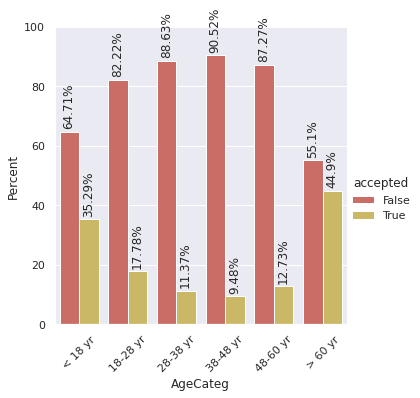

In [ ]:
x,y = 'AgeCateg', 'accepted'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

#palette = sns.cubehelix_palette(light=.8, n_colors=6)
palette = sns.color_palette("hls", 8)

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette)
g.ax.set_ylim(0,100)

plt.xticks(rotation=45)

#plt.figure(figsize=(300, 150))

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() +0.055
    txt_y = p.get_height()+2
    g.ax.text(txt_x,txt_y,txt, rotation =90)


plt.show()

**Inference: The People below 18 years old(but more than 17 years old) and the people above 60 year old are more were more likely to subscribe to the current campaign**

## Job vs Acceptance

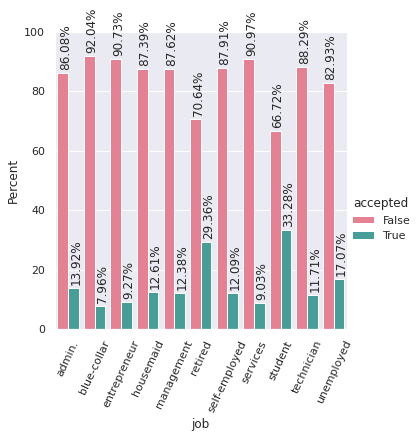

<Figure size 21600x10800 with 0 Axes>

In [ ]:
x,y = 'job', 'accepted'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

palette = sns.color_palette("husl", 2)

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette)
g.ax.set_ylim(0,100)

plt.xticks(rotation=65)

#plt.figure(figsize=(300, 150))

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() +0.055
    txt_y = p.get_height()+2
    g.ax.text(txt_x,txt_y,txt, rotation =90)


plt.show()

**Students and Retired people are most probable to subscribe to the campaign**

## Marital status vs Acceptance

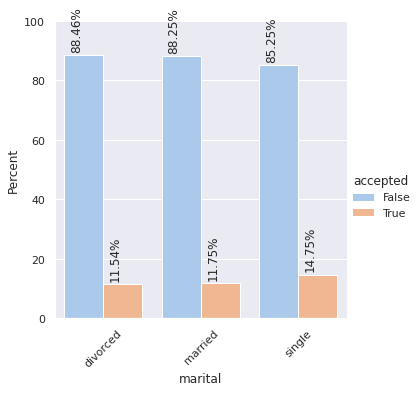

<Figure size 21600x10800 with 0 Axes>

In [ ]:
x,y = 'marital', 'accepted'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

palette = sns.color_palette("pastel", 4)

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette)
g.ax.set_ylim(0,100)

plt.xticks(rotation=45)

#plt.figure(figsize=(300, 150))

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() +0.055
    txt_y = p.get_height()+2
    g.ax.text(txt_x,txt_y,txt, rotation =90)


plt.show()

**Customer profiles of the marital status being Single are most probable to the subscription**



## Exploring Acceptance with multiple profile parameters at a time


In [ ]:
yes=train[train['accepted']==True] #data frame of all the people who accepted
no=train[train['accepted']==False] #data frame of all the people who did not accept


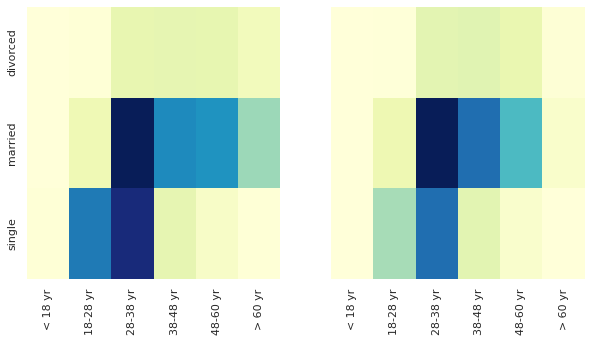

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2,sharey=True)

g1 = sns.heatmap(pd.crosstab([yes.marital],[yes.AgeCateg]),cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(pd.crosstab([no.marital],[no.AgeCateg]),cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')

plt.show()

 **Plotting heatmaps of both success and failure of acceptance is good way to have multiple inferences at the same time.**

**28-38 year old single people are more probable to subscribe than reject the campaign**

**28-38 year old married people are equally split over accepting and passing up on the campaign.**

**People older than 60 years have more chances to accept to the campaign than reject the offer.**

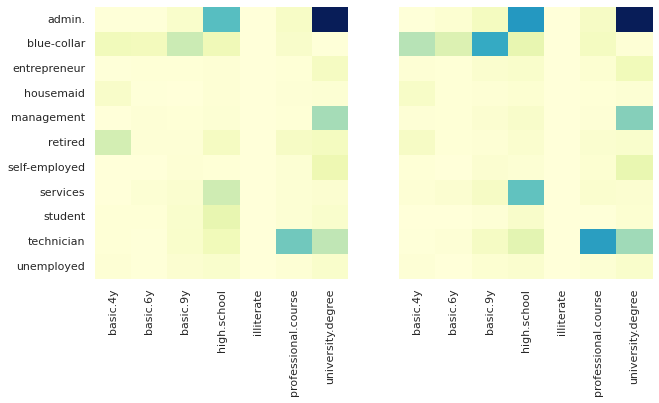

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2,sharey=True)

g1 = sns.heatmap(pd.crosstab([yes.job],[yes.education]),cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2= sns.heatmap(pd.crosstab([no.job],[no.education]),cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')

plt.show()

**Education as a parameter doesn't lead to any bug conclusions. Hence, education may not be a decising factor on whether people will subscribe to marketing campaigns**

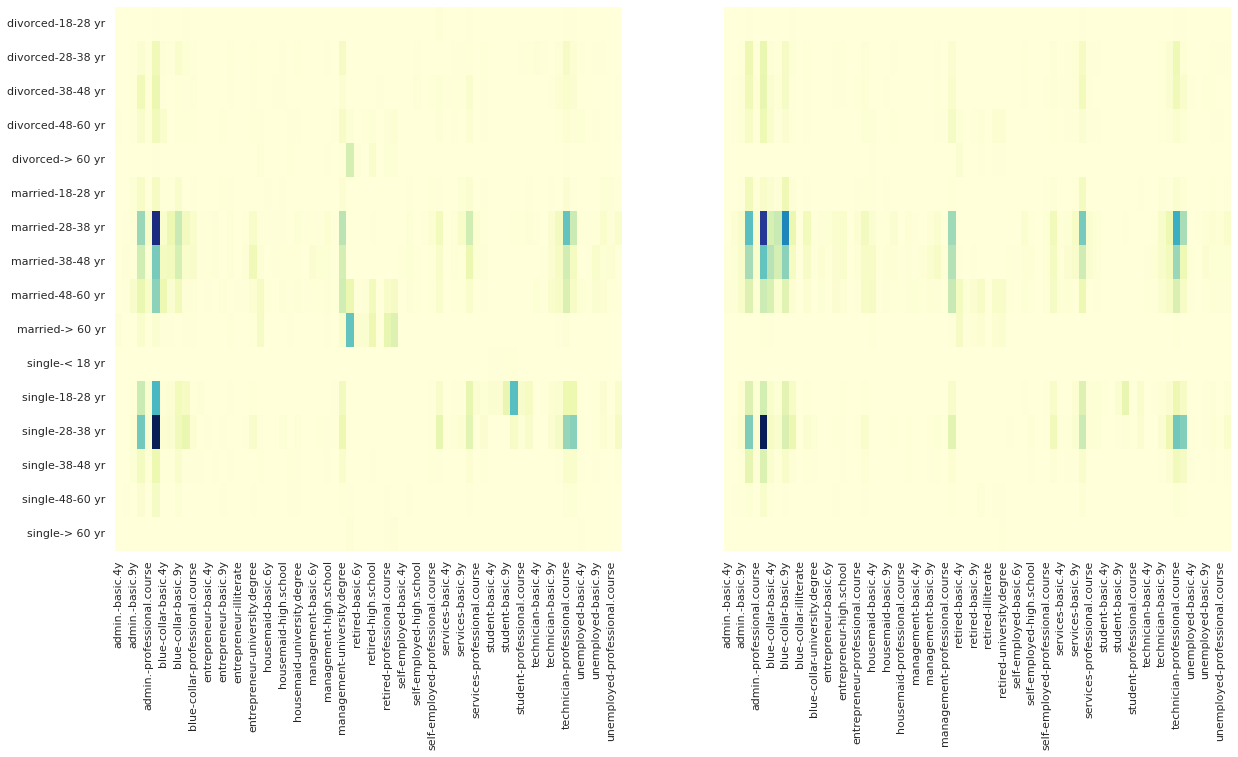

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(20, 10))


g1 = sns.heatmap(pd.crosstab([yes.marital,yes.AgeCateg], [yes.job,yes.education]),cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(pd.crosstab([no.marital,no.AgeCateg], [no.job,no.education]),cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')

plt.show()

**Single 18-28 year old working in blue collar jobs, married >60 year old retired people, single 18-28 year old students are the 3 ideal profile parameters for potential people to signup from the campaign, where number of people to accept will be significantly higher than those who do not in the same category.**

## Second Question: Does the financial situation of people have an impact on how they answer ?

accepted                 False      True
housing loan default                    
no      no   no       0.876993  0.123007
             yes      1.000000  0.000000
        yes  no       0.877403  0.122597
yes     no   no       0.868904  0.131096
             yes      1.000000  0.000000
        yes  no       0.877242  0.122758 




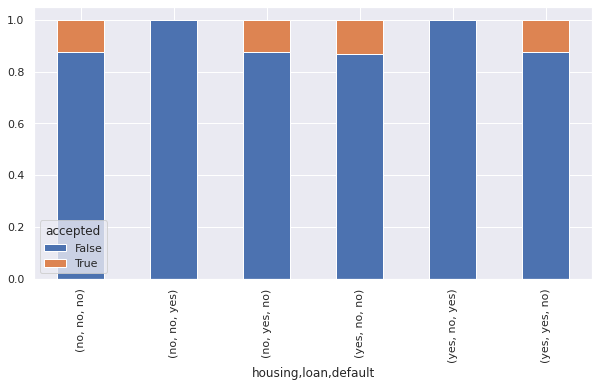

In [ ]:
train_fin=train[['housing','loan','default','accepted']]

crosstab_comb=pd.crosstab([train_fin['housing'],train_fin['loan'],train_fin['default']],[train_fin['accepted']],normalize='index')
print(crosstab_comb,"\n\n")
crosstab_comb.plot.bar(stacked=True)

plt.show()

**In Financial parameters, a combination of No| No | No , No|Yes|No , Yes|No|No and Yes|Yes|No for fields of housing loan, personal loan and credit default respectively are most co-related to give acceptance for the campaign**

##3 - Do the timing (date / duration) and type of contact matter significantly ?How ? Is it the same for all groups of people ?

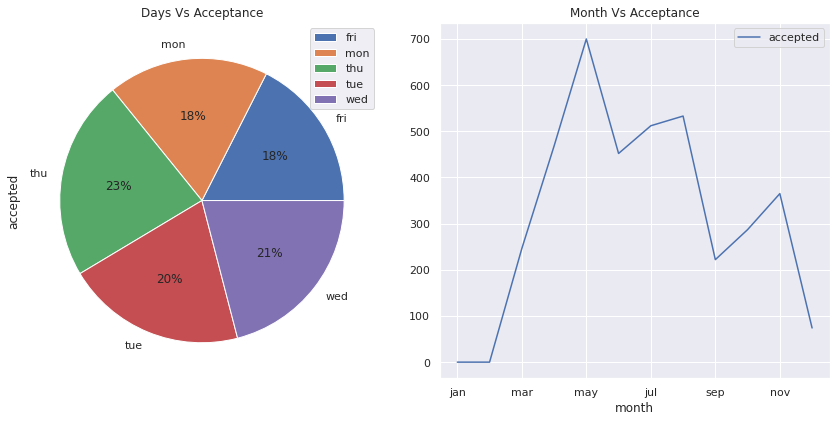

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
palette = sns.color_palette("bright")

yes.groupby(['day_of_week']).sum().plot(kind='pie', ax= axes[0],y='accepted', autopct='%1.0f%%', title='Days Vs Acceptance' )

yes.groupby(['month']).sum().plot(kind='line', ax= axes[1], y='accepted', title='Month Vs Acceptance')

fig.tight_layout(pad=1.0)

plt.show()

**The day of the week does not appear to have any significant effect on whether a person is predictable to agree to the campaign. But if there were to be some result extracted from the analysis, it is that more acceptance is noticed on calls made on Thursdays with least rate on mondays and fridays**

**The month of May appears to have the highest amount of acceptance followed by August and July. So these are the months where more people are likely to accept.**

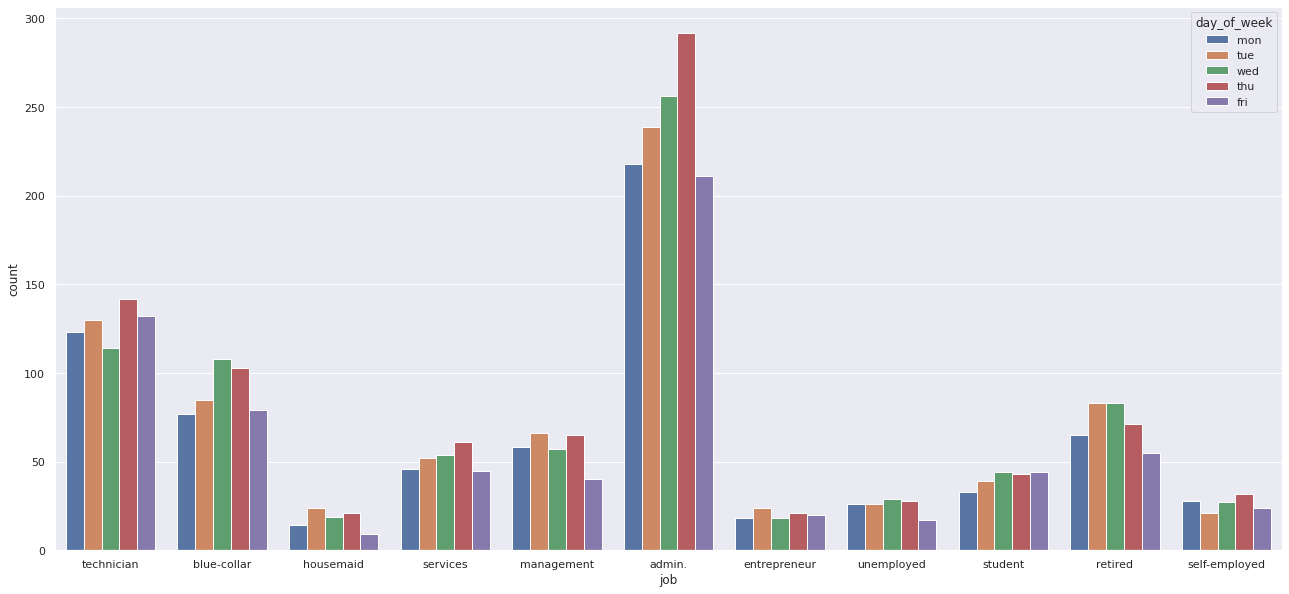

In [ ]:
plt.figure(figsize=(22, 10))

sns.countplot(data=yes, x= 'job', hue='day_of_week')
plt.show()

**With this graph, we can understand the day of the week which is most convinient for each job sector to accept to the marketing campign being made:**

**Technician: Thursday**

**Blue-collar: Wednesday**

**Housemaid: Tuesday**

**Services: Thursday**

**Management: Tuesdays or Thursdays**

**Admin:Thursday**

**Entrepreneur: Tuesday**

**Unemployed: Wednesday**

**Student: Wednesdays or Fridays**

**Retired: Tuesdays or Wednesdays**

**Self-employed: Thursdays**


<ipython-input-139-dcfbf2263d8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes['marital&age']=yes['marital'].astype(str) + " " +yes['AgeCateg'].astype(str)


<AxesSubplot:xlabel='count', ylabel='marital&age'>

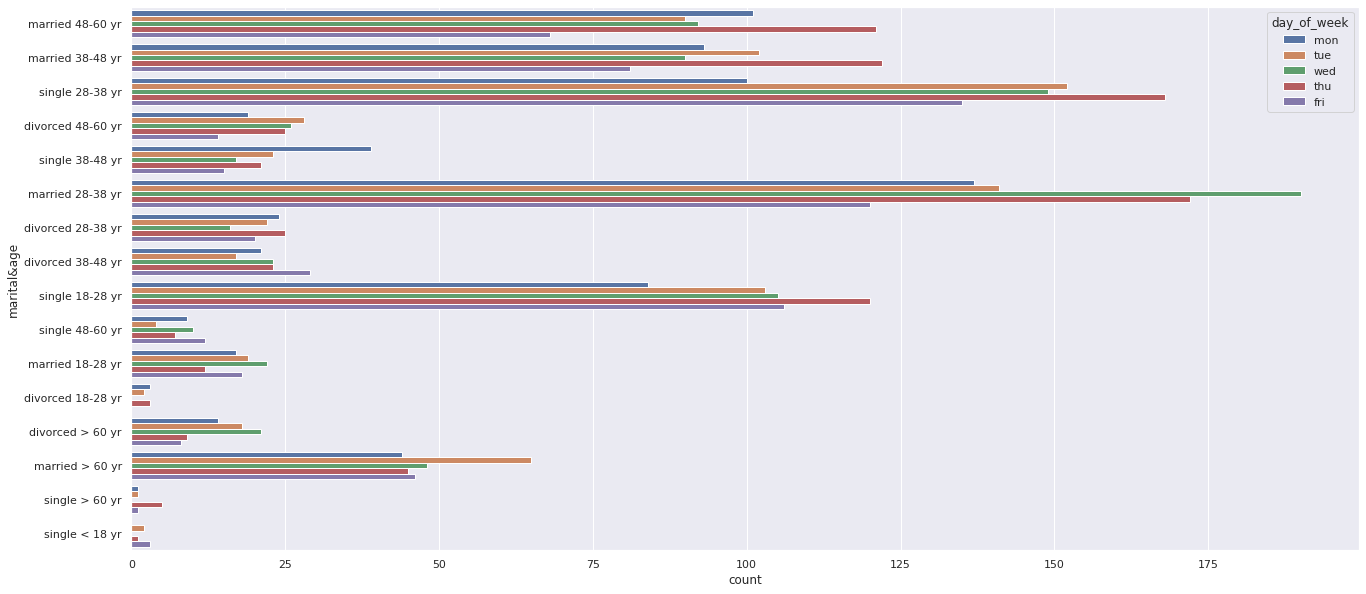

In [ ]:
plt.figure(figsize=(22, 10))

yes['marital&age']=yes['marital'].astype(str) + " " +yes['AgeCateg'].astype(str)

sns.countplot(data=yes, y= 'marital&age', hue='day_of_week')

**With this graph we can understand the ideal weekdays to contact for other customer profiles than just jobs. Fewly high count profile and their days of the week:**

**Single 28-38 year old : Thursday**

**Married 28-38 year old : Wednesday**


In [ ]:
#Since duration is a range based column, we are changing it to a category column
#train['duration'].describe()
import numpy as np
train['time']= train['duration']/60
decimals = 1
train['time'] = train['time'].apply(lambda x: round(x, decimals))
train['time'].describe()
time_condition= [
    (train['time']==0),
    (train['time']>0) & (train['time']<=2),
    (train['time']>2) & (train['time']<=5),
    (train['time']>5) & (train['time']<=10),
    (train['time']>10) & (train['time']<=15),
    (train['time']>15) & (train['time']<=30),
    (train['time']>30)
]

time_values= ['Disconnected','Under 2 mins','2-5 mins','5-10 mins','10-15 mins', '15-30 mins','>30-60 mins']

train["minutes"]=np.select(time_condition, time_values)
train.sample(10)

,age,AgeCateg,job,marital,education,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted,time,minutes
21491,32,28-38 yr,admin.,married,university.degree,no,yes,no,cellular,aug,...,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,False,2.1,2-5 mins
15956,37,28-38 yr,blue-collar,single,basic.9y,no,no,no,cellular,jul,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,False,2.8,2-5 mins
33765,32,28-38 yr,blue-collar,single,basic.4y,no,no,no,cellular,may,...,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,True,15.0,10-15 mins
25292,31,28-38 yr,admin.,married,high.school,no,yes,no,cellular,nov,...,1,failure,-0.1,93.200,-42.0,4.153,5195.8,False,1.6,Under 2 mins
20442,51,48-60 yr,admin.,divorced,professional.course,no,no,yes,cellular,aug,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,False,3.5,2-5 mins
35707,27,18-28 yr,admin.,divorced,high.school,no,yes,no,cellular,may,...,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,False,2.8,2-5 mins
13959,37,28-38 yr,technician,married,professional.course,no,yes,no,cellular,jul,...,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,False,5.2,5-10 mins
38472,29,28-38 yr,admin.,single,university.degree,no,yes,no,cellular,oct,...,0,nonexistent,-3.4,92.431,-26.9,0.731,5017.5,False,1.8,Under 2 mins
9803,34,28-38 yr,blue-collar,married,high.school,no,yes,no,telephone,jun,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,False,0.7,Under 2 mins
23590,37,28-38 yr,technician,married,university.degree,no,yes,yes,cellular,aug,...,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,False,3.0,2-5 mins


In [ ]:
yes=train[train['accepted']==True]
Y=yes['minutes'].value_counts()
#print(Y,"\n\n")
A=train['minutes'].value_counts()
#print(A,"\n\n")
Ratio=Y/A

Ratio

10-15 mins      0.449043
15-30 mins      0.593143
2-5 mins        0.096495
5-10 mins       0.213577
>30-60 mins     0.556962
Disconnected         NaN
Under 2 mins    0.016432
Name: minutes, dtype: float64

**15 minutes to 60 minutes are the ideal time durations for the calls to last in order to have maximum acceptance rate**

In [ ]:
train[(train['minutes']=='Disconnected')]

,age,AgeCateg,job,marital,education,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted,time,minutes
6251,39,38-48 yr,admin.,married,high.school,no,yes,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,0.0,Disconnected
23031,59,48-60 yr,management,married,university.degree,no,yes,no,cellular,aug,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,False,0.0,Disconnected
24999,50,48-60 yr,entrepreneur,married,basic.9y,no,no,no,telephone,nov,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,False,0.0,Disconnected
28063,53,48-60 yr,blue-collar,divorced,high.school,no,yes,no,cellular,apr,...,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,False,0.0,Disconnected
28239,44,38-48 yr,blue-collar,married,basic.9y,no,no,no,cellular,apr,...,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,False,0.0,Disconnected
33015,31,28-38 yr,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,False,0.0,Disconnected
40554,72,> 60 yr,retired,married,professional.course,no,no,no,cellular,sep,...,1,failure,-1.1,94.199,-37.5,0.886,4963.6,False,0.0,Disconnected
40687,38,28-38 yr,services,single,high.school,no,yes,no,telephone,sep,...,3,success,-1.1,94.199,-37.5,0.879,4963.6,False,0.0,Disconnected


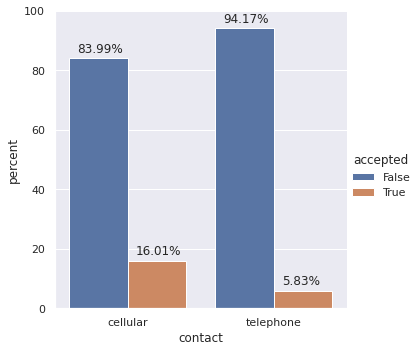

In [ ]:
x,y = 'contact', 'accepted'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

#plt.xticks(rotation=90)

#plt.figure(figsize=(300, 120))

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() +0.055
    txt_y = p.get_height()+2
    g.ax.text(txt_x,txt_y,txt) #rotation =90)


plt.show()

**Cellular is the best way to contact, as that is the medium having more potential for conversion for the current campaign.**

## 4 - What is the best number of contacts to reach agreement ? What is the best delay ? Are people more likely to agree to the campaign if they have already agreed in the past ?

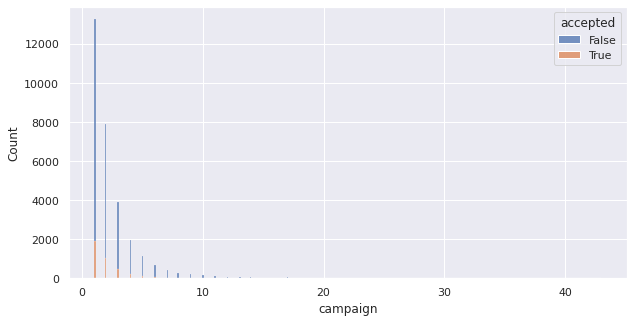

<Figure size 1584x720 with 0 Axes>

In [ ]:
sns.histplot(data=train, x= 'campaign', hue='accepted',multiple='stack')
plt.figure(figsize=(22, 10))

plt.show()


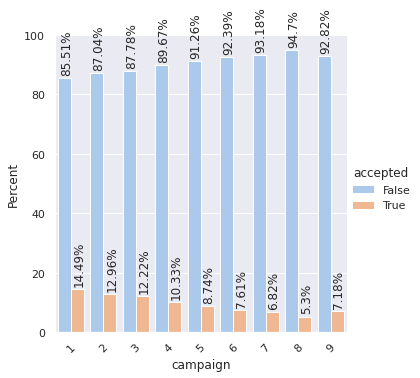

<Figure size 21600x10800 with 0 Axes>

In [ ]:
x,y = 'campaign', 'accepted'
temp=train[train['campaign']<10]

df1 = temp.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

palette = sns.color_palette("pastel", 4)

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette)
g.ax.set_ylim(0,100)

plt.xticks(rotation=45)

plt.figure(figsize=(300, 150))

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() +0.055
    txt_y = p.get_height()+2
    g.ax.text(txt_x,txt_y,txt, rotation =90)


plt.show()

**The first call would be best time to convince the customer to signup for the campign. This can be done by taking into account of other points raised till now such as the call duration and day of the week and such.**

**If not for the first call, the acceptance ratio keeps decreasing as the number of calls increases.**

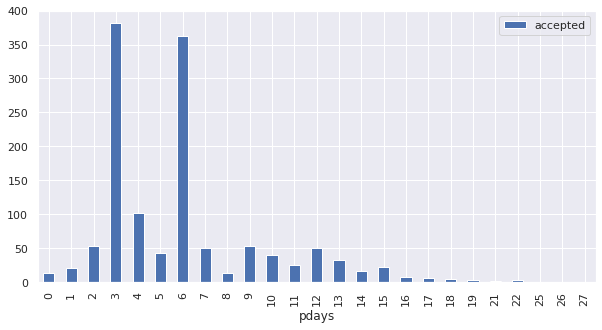

In [ ]:
p_train = train.drop(train[train.pdays == 999].index)

p_train.groupby(['pdays']).count().plot(kind='bar', y='accepted')
plt.show()

**The best delay would be 3 days followed by 6 days**

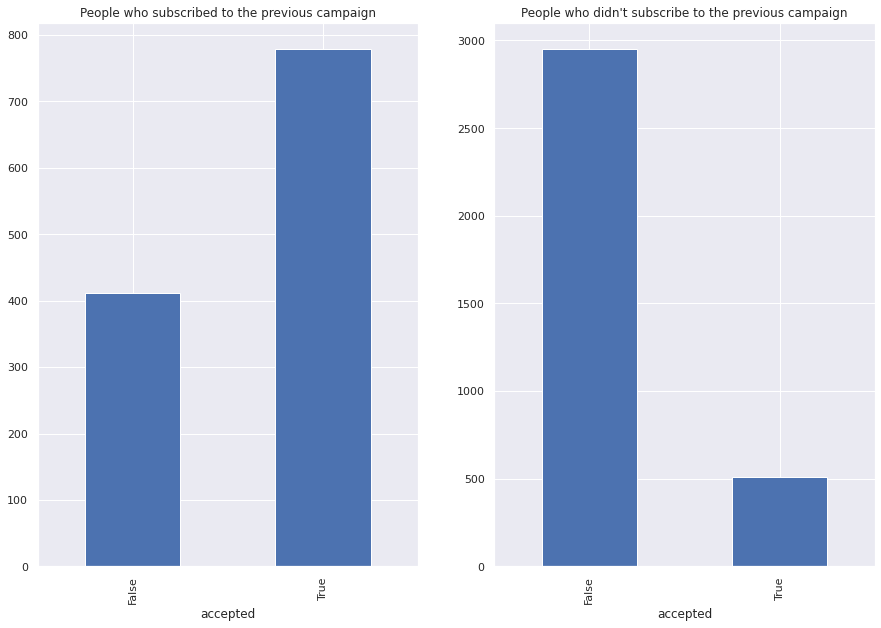

In [ ]:
#train['poutcome']=='success'
import seaborn as sns
#prev_y.sample(5)
past_y= train[train['poutcome']=='success']

past_n= train[train['poutcome']=='failure']
#past_n.sample(10)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 10))

past_y.groupby(['accepted'])['accepted'].count().plot(kind='bar',ax=axes[0], title='People who subscribed to the previous campaign')
past_n.groupby(['accepted'])['accepted'].count().plot(kind='bar', ax=axes[1], title="People who didn't subscribe to the previous campaign")

plt.show()


These two grpahs show that, among the people who agreed to the previous campaign are most likely to accept to the current campaign as well. Likewise, people who declined the previous campaign are more likely to turn down the current campign as well. But it is good to notice that there is still a small proportion of people who had  refused to the  previous campaign. Makes sense now why we get calls from banks in real life regarding campaigns, despite mutiple times of turning them down.

## 5 - Does the economy (Employment variation rate / Consumer Price Index / Consumer Confidence Index / Euribor / etc.) have an impact ? How ? Is it the same for everybody ?

<AxesSubplot:>

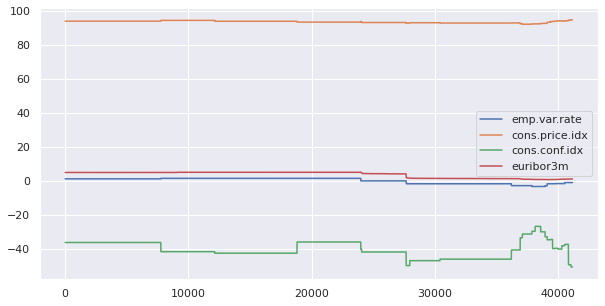

In [ ]:
#Understanding the indexes
train.describe(include='all')
indexes=train[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','accepted','nr.employed']]
indexes_sans_nr_employed=train[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','accepted']]

#indexes.describe(include='all')
#indexes.plot.line()
indexes_sans_nr_employed.plot.line()

In [ ]:
indexes.sample(10)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,accepted,nr.employed
30216,-1.8,93.075,-47.1,1.365,False,5099.1
11853,1.4,94.465,-41.8,4.959,False,5228.1
40862,-1.1,94.601,-49.5,0.942,False,4963.6
34391,-1.8,92.893,-46.2,1.266,False,5099.1
1368,1.1,93.994,-36.4,4.855,False,5191.0
39339,-1.8,93.369,-34.8,0.637,True,5008.7
35138,-1.8,92.893,-46.2,1.250,False,5099.1
15406,1.4,93.918,-42.7,4.957,False,5228.1
33885,-1.8,92.893,-46.2,1.281,False,5099.1
17367,1.4,93.918,-42.7,4.962,False,5228.1


In [ ]:
indexes.describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,1.610399,0.585374,4.789249,1.777231,75.158065
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
indexes.corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,accepted,nr.employed
emp.var.rate,1.000000,0.766055,0.157593,0.969412,-0.305365,0.900390
cons.price.idx,0.766055,1.000000,0.027217,0.667292,-0.128752,0.488871
cons.conf.idx,0.157593,0.027217,1.000000,0.243637,0.061638,0.075283
euribor3m,0.969412,0.667292,0.243637,1.000000,-0.315869,0.944871
accepted,-0.305365,-0.128752,0.061638,-0.315869,1.000000,-0.364230
nr.employed,0.900390,0.488871,0.075283,0.944871,-0.364230,1.000000


Employment variablity rate , Euribor3m and nr.employed indexes have maximum correlation within themselves. So we look to explore into them in specific.

<AxesSubplot:ylabel='accepted'>

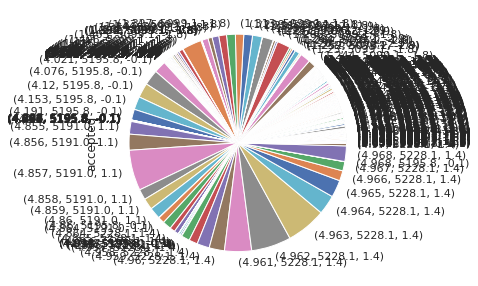

In [ ]:
#sns.countplot(data=indexes, hue='accepted',y='euribor3m')
indexes.groupby(['euribor3m','nr.employed','emp.var.rate'])['accepted'].count().plot(kind='pie')


4.857,51918, 1.1 AND 4.962,5.228,1.4 AND 4.963, 5228.1, 1.4 being the values of euribor3m, nr.employed and emp.var.rate . A amalgum of these specific instances have highest acceptance rates. So the economy factors does have an impact on the acceptance.

## 6 - Any interesting insights to add ?

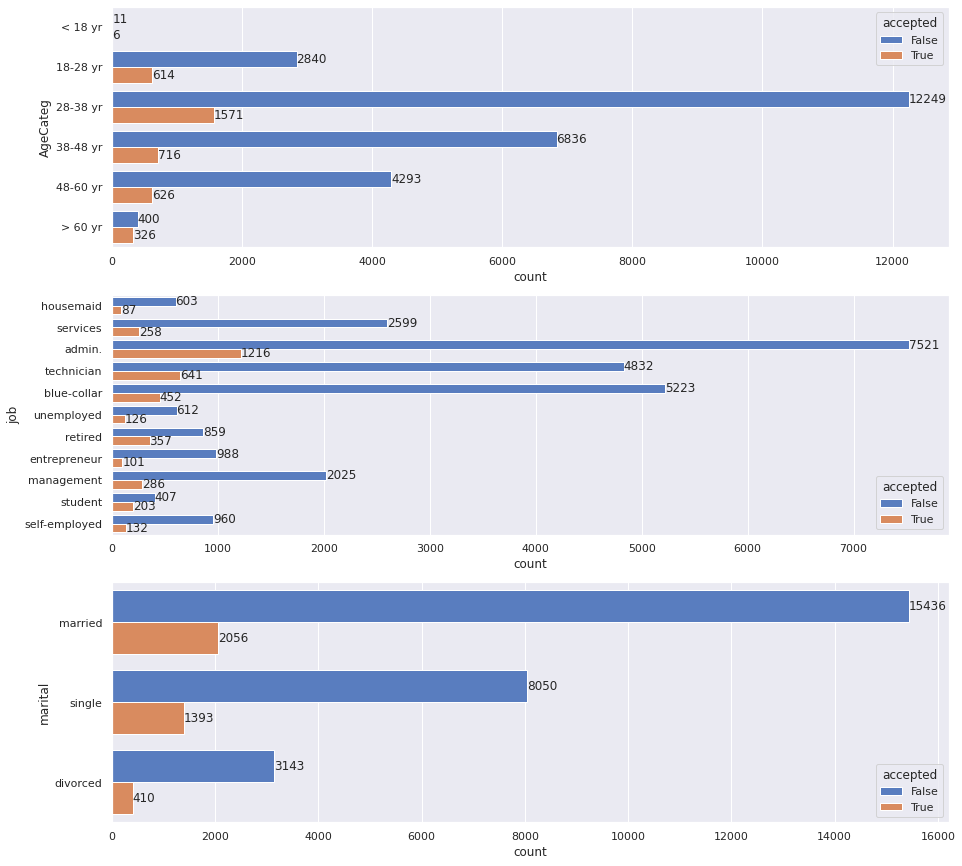

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15, 15))
palette = sns.color_palette("muted")

axi1=sns.countplot(y='AgeCateg' ,hue='accepted',data=train,ax=axes[0], palette=palette)
axi1.bar_label(axi1.containers[0])
axi1.bar_label(axi1.containers[1])

axi2=sns.countplot(y='job' ,hue='accepted',data=train,ax=axes[1], palette=palette)
axi2.bar_label(axi2.containers[0])
axi2.bar_label(axi2.containers[1])

axi3=sns.countplot(y='marital' ,hue='accepted',data=train,ax=axes[2], palette=palette)
axi3.bar_label(axi3.containers[0])
axi3.bar_label(axi3.containers[1])


plt.show()

**Though I have used count plot with percentages to get the most weighted categories for each parameter of the customer, it is also interesting to take a look at count. So that the customer profile brackets with higher acceptance rates but low reach out rates can be reached out with priority to smartly use data analytics to get more acceptance.**